# 1. Understand the Problem

Goal: Predict house prices in Paris using the dataset.

Type of problem: Regression (because house price is continuous).

Evaluation metric: Mean Squared Error (MSE) or Root Mean Squared Error (RMSE) is common for regression tasks.

# 2. Understand the Data

Numerical Continuous Features:
squareMeters, floors, cityPartRange, numPrevOwners, made, basement, attic, garage, hasGuestRoom, price.

Binary Features (0/1):
hasYard, hasPool, isNewBuilt, hasStormProtector, hasStorageRoom.

Categorical (encoded as numbers but actually categories):
cityCode → represents a location/zipcode, which may influence price strongly.

### 2.1 Load and Explore the Dataset


In [3]:
import pandas as pd

In [4]:
df = pd.read_csv('ParisHousing.csv')
print(df.head())
print(df.info())
print(df.describe())
print(df.isnull().sum())

   squareMeters  numberOfRooms  hasYard  hasPool  floors  cityCode  \
0         75523              3        0        1      63      9373   
1         80771             39        1        1      98     39381   
2         55712             58        0        1      19     34457   
3         32316             47        0        0       6     27939   
4         70429             19        1        1      90     38045   

   cityPartRange  numPrevOwners  made  isNewBuilt  hasStormProtector  \
0              3              8  2005           0                  1   
1              8              6  2015           1                  0   
2              6              8  2021           0                  0   
3             10              4  2012           0                  1   
4              3              7  1990           1                  0   

   basement  attic  garage  hasStorageRoom  hasGuestRoom      price  
0      4313   9005     956               0             7  7559081.5  
1     

### 2.2 Exploratory Data Analysis (EDA)

In [5]:
import seaborn as sns
import matplotlib.pyplot as plt

### 2.2.1 Distribution of target (price)

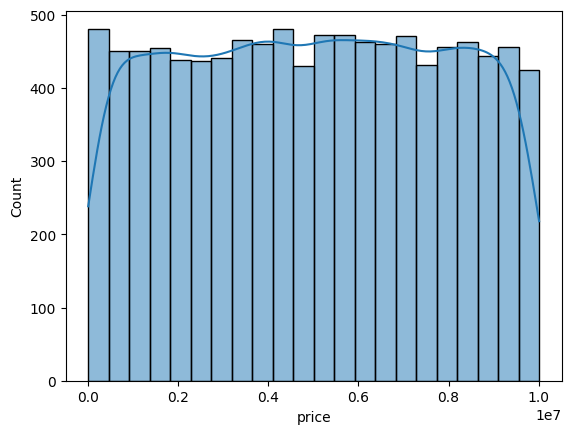

In [6]:
sns.histplot(df['price'], kde=True)
plt.show()

### 2.2.2 Relationship between size and price

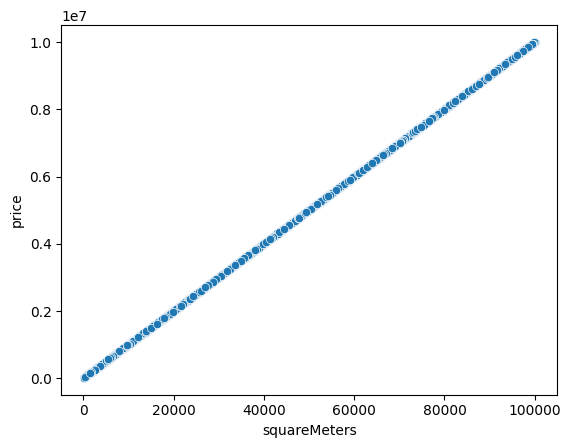

In [7]:
sns.scatterplot(x='squareMeters', y='price', data=df)
plt.show()


### 2.2.3 Impact of binary features
Example: Does having a pool increase price?

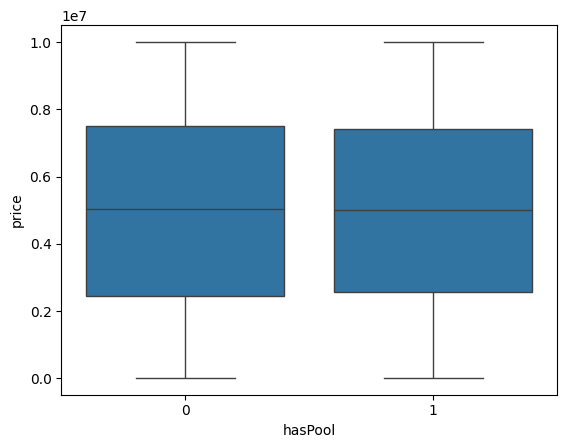

In [8]:
sns.boxplot(x='hasPool', y='price', data=df)
plt.show()


### 2.2.4 Neighborhood Effect

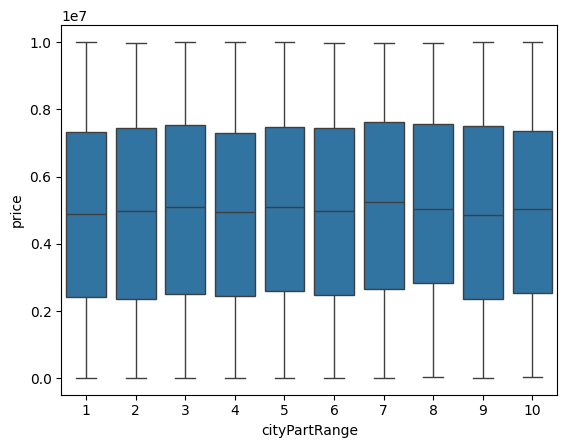

In [14]:
sns.boxplot(x='cityPartRange', y='price', data=df)
plt.show()



### 2.2.5 Correlation Heatmap

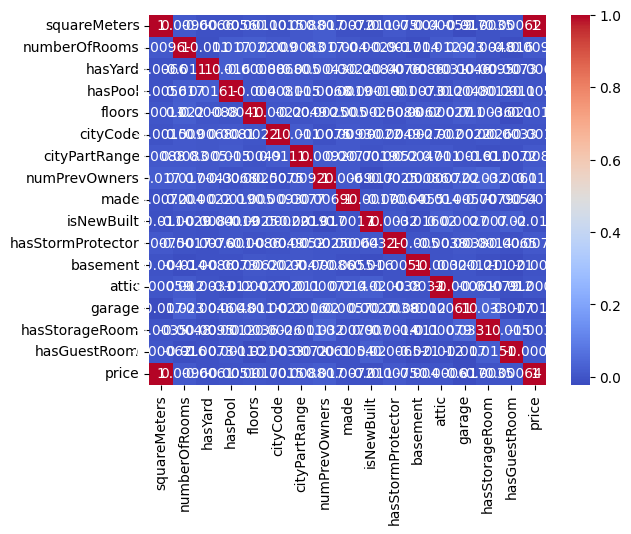

In [15]:
corr = df.corr()
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.show()


### 2.2.6 Year Built (made) vs Price

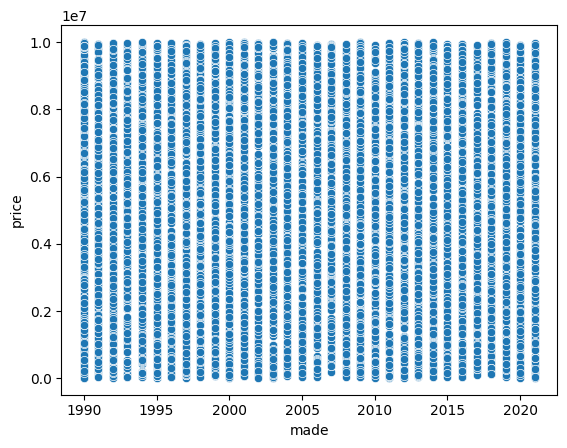

In [19]:
sns.scatterplot(x='made', y='price', data=df)
plt.show()


## 3.Split Data

In [12]:
from sklearn.model_selection import train_test_split

X = df.drop('price', axis=1)
y = df['price']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


# 4.Linear Regression

In [13]:
import pickle
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error

model = LinearRegression()
model.fit(X_train, y_train)

with open("model.pkl", "wb") as f:
    pickle.dump(model, f)

y_pred = model.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
rmse = mse**0.5
mae = mean_absolute_error(y_test, y_pred)

print("MSE:", mse)
print("RMSE:", rmse)
print("MAE:", mae)


MSE: 3695708.440619414
RMSE: 1922.4225447646556
MAE: 1510.034180854408
